In [447]:
from utilsGeneral import UtilsGeneral
from utilsModel import UtilsModel
from utilsPlot import UtilsPlot
from KnapSack import KnapSack
from shallowNet.shallowNet import shallowNet, DenseTranspose
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import collections



In [2]:
knapSack = KnapSack("100_5_25_1")
utg = UtilsGeneral(knapSack)
utm = UtilsModel(utg)
utp = UtilsPlot(utilsGeneral = utg, utilsModel = utm)
fitness_function = knapSack.Fitness

Best Objective Value: 0


In [771]:
set1, set2 = utg.load_datasets(1,2)
model1, model2, model3= utg.load_models(1,2, 3)

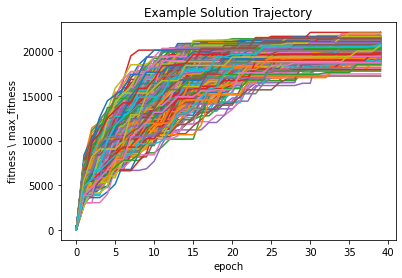

In [360]:
max_fitness, final_solutions = utp.plot_trajectory_evolution(100, learning_steps = 40, sample_number=600, model = model2)

In [345]:
def TrainToSol(sol):
    ConvertSol = np.copy(sol)
    ConvertSol[sol == -1] = 0
    return ConvertSol

def SolDistribution(sol):
    arr = np.zeros(100)
    for i in sol:
        arr += TrainToSol(i)
    return arr/ np.shape(sol)[0]



def che(sol):
    arr = SolDistribution(sol)
    return AverageElements(arr)

In [346]:
fin = copy.copy(final_solutions)
tmp = SolDistribution(final_solutions)
sum = 0
step = 0
for elem in tmp: 
    if elem != 0:
        sum += elem
        step += 1
print(sum/step)


0.37376344086021496


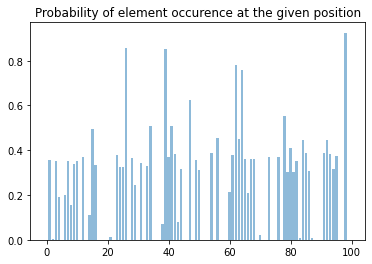

In [362]:
plt.figure()
plt.title("Probability of element occurence at the given position")
plt.bar(np.arange(100), SolDistribution(final_solutions), align = "center", alpha = 0.5)
plt.show()

In [304]:
tmp = SolDistribution(final_solutions)

AverageElements(tmp)


0.37376344086021496

In [398]:
np.dot(np.ones(100), knapSack.R)

array([47707., 54907., 46203., 52222., 53840.])

768.42  -  172.39386183968384


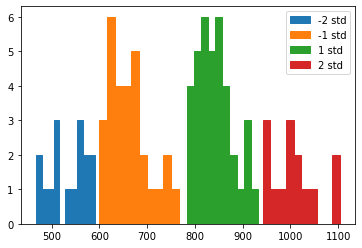

In [472]:
array =  knapSack.P.tolist()
lambda_cof = 1
std = 172.39386183968384
numbers_of_partition = 2
mean = 768.42
print(mean, " - ", std)
arraycopy = copy.copy(array)
res = []
mapindex = {}
stop = False
for i in range(1,numbers_of_partition+1): 
    tmp_left = []
    tmp_right = []
    array_len = len(arraycopy)
    for j in range(array_len):
        element = arraycopy.pop(0)
        if element >= mean - i * std/lambda_cof and element <= mean:
            tmp_left.append(element)
        elif element >= mean and element <= mean + i * std/lambda_cof:
            tmp_right.append(element)
        else:
            arraycopy.append(element)

    res.insert(0, np.asarray(tmp_left))
    res.append(np.asarray(tmp_right))    
for i in range(numbers_of_partition*2):
    
    index = -numbers_of_partition+i
    if i >= numbers_of_partition:
        index += 1
    plt.hist(res[i], histtype='step', stacked=True, fill=True, label = "{} std".format(index))
plt.legend()
plt.show()


In [457]:
np.sum(knapSack.P.tolist())/np.shape(knapSack.P)[0]

768.42

In [460]:
type(knapSack.P)

numpy.ndarray

In [461]:
tmp = knapSack.P.tolist()
np.std(tmp)

172.39386183968384

In [605]:
def partition(array, numbers_of_partition=2, lambda_cof=1, mean= None, std = None):
    def get_index_list(array, element):
        return [i for i, e in enumerate(array) if e == element]
    array = array.tolist()
    if std == None:
        std = np.std(array)
    if mean == None:
        mean = np.sum(array)/np.shape(array)[0] ### idk why np.mean(...) does not work 
    arraycopy = copy.copy(array)
    res = []
    mapindex = {}
    stop = False
    for i in range(1,numbers_of_partition+1): 
        tmp_left = []
        tmp_right = []
        array_len = len(arraycopy)
        for j in range(array_len):
            element = arraycopy.pop(0)
            if mapindex.get(element) == None:
                    mapindex[element] = get_index_list(array, element)
            if i == numbers_of_partition:
                if element < mean:
                    tmp_left.append(mapindex[element].pop())
                else:
                    tmp_right.append(mapindex[element].pop())
            else:
                if element >= mean - i * std/lambda_cof and element <= mean:
                    tmp_left.append(mapindex[element].pop())
                    
                elif element >= mean and element <= mean + i * std/lambda_cof:
                    tmp_right.append(mapindex[element].pop())
                else:
                    arraycopy.append(element)
                
        res.insert(0, np.asarray(tmp_left))
        res.append(np.asarray(tmp_right))

    return res

In [711]:
def choose_group():
    p = [0.3, 0.3, 0.2, 0.2]
    r = np.random.choice(np.arange(len(p)),1, p=p)[0]
    x = np.random.choice(np.arange(2),1, p = [0.1, 0.9])[0]
    length = len(p)
    if r+x>length-1:
        x-=1
    return r, r+x

def flip(solution, index_one, index_two):
    solution[index_one] *= -1
    solution[index_two] *= -1
    return

def search_function(array, par, choosing_group_function = None, debuge_variation=False):
    if choosing_group_function == None:
        choosing_group_function = choose_group
    i_one, i_two = choosing_group_function()

    group_one = par[i_one]
    group_two = par[i_two]

    if len(group_one) == 0 or len(group_two) == 0:
        utg.flip(array, 100)
        return
    index_one = np.random.randint(len(group_one))
    index_two = np.random.randint(len(group_two))

    if not debuge_variation:
        flip(array, group_one[index_one], group_two[index_two])
    else:
        print(array)
        print(i_one, ", ", i_two, " partition shape: ", np.shape(par))
        print("index_one: ", index_one," -> " ,group_one[index_one], " = ", array[group_one[index_one]] )
        print("index_two: ", index_two," -> " ,group_two[index_two], " = ", array[group_two[index_two]] )
        flip(array, group_one[index_one], group_two[index_two])
        print("index_one: ", index_one," -> " ,group_one[index_one], " = ", array[group_one[index_one]] )
        print("index_two: ", index_two," -> " ,group_two[index_two], " = ", array[group_two[index_two]] )
    

partition
partition
partition
partition


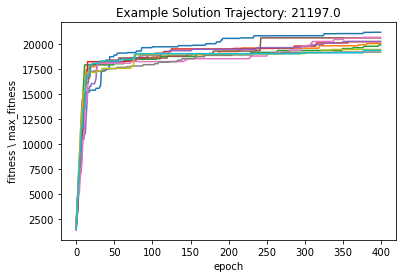

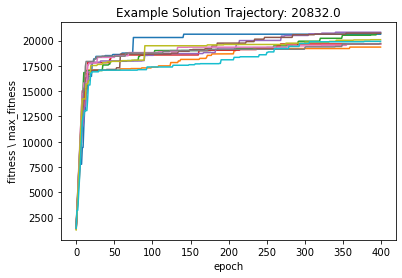

(array([[ 1571.,  1652.,  1736., ...,  1453.,  1275.,  1443.],
        [ 2872.,  3229.,  3318., ...,  2953.,  2854.,  3219.],
        [ 4427.,  4891.,  5039., ...,  4511.,  4474.,  3219.],
        ...,
        [20638., 19363., 20741., ..., 19665., 20095., 19928.],
        [20638., 19363., 20741., ..., 19721., 20095., 19928.],
        [20638., 19363., 20741., ..., 19721., 20095., 19928.]]),
 [])

In [712]:
def plot_trajectory(sample_size, search = None, sample_number=10, learning_steps=100, transfer_step = 50, model=None, debuge_variation=False):
    global_solution = []
    par = []
    current_solutions_container = [utg.initialize_solution(sample_size) for i in range(sample_number)]
    max_fitness = 0
    for i in range(learning_steps):
        if i <transfer_step -1: 
            search = utg.flip
        else:
            if i % (transfer_step -1) == 0:
                print("partition")
                par = partition(knapSack.P, numbers_of_partition=2, lambda_cof=1)    
        tmp_his = []
        for j in range(sample_number):
            copy_solution = copy.copy(current_solutions_container[j])
            if i > (transfer_step -1): 
                search_function(copy_solution, par = par, choosing_group_function = choose_group, debuge_variation = False)
            else:
                utg.flip(copy_solution, sample_size)
            current_fitness = fitness_function(current_solutions_container[j])
            new_fitness = fitness_function(copy_solution)
            if new_fitness > current_fitness:
                current_solutions_container[j] = copy_solution
                current_fitness = new_fitness
            tmp_his.append(current_fitness)
            if current_fitness >= max_fitness:
               max_fitness =current_fitness

        global_solution.append(np.asarray(tmp_his))
    global_solution = np.asarray(global_solution)
    plt.figure()
    plt.title("Example Solution Trajectory: {}".format(max_fitness))
    X = np.arange(learning_steps)
    for j in range(sample_number):
        plt.plot(X, global_solution[:,j])
    plt.xlabel("epoch")
    plt.ylabel("fitness \ max_fitness")
    plt.show()
        
    return global_solution, par
plot_trajectory(100, learning_steps= 400, transfer_step = 100)
plot_trajectory(100, learning_steps= 400, transfer_step = 500)


In [738]:
def code(array, encoder, input_size=None, latent_size=None, debuge_variation=False):
    if input_size == None:
        input_size = len(array) # if input_size is implicit do not waist time to calcule it
    if latent_size == None:
        latent_size = np.shape(encoder.layers[-1].get_weights()[0])[-1] # if latent_size is implicit do not waist time to calcule it
    print(latent_size)
    encoded_solution = encoder(np.expand_dims(array, axis = 0)).numpy().flatten() # encode array 
    return encoded_solution
def decod(encoded_solution, decoder, latent_size, output_size):
    new_tensor = decoder(encoded_solution.reshape(1,latent_size)) # decode changed solution 
    output_array_binary = np.where(new_tensor.numpy()[-1] > 0.0, 1, -1)  # binarize decoded tensor around 0.0
    new_fitness = fitness_function(output_array_binary) # calculate new fitness
    return output_array_binary, new_fitness

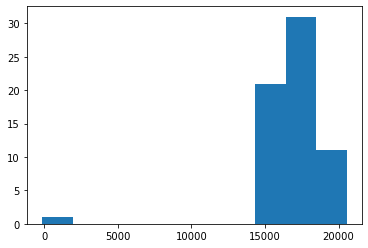

In [777]:
e, d= utm.split_model_into_encoder_decoder(model3)
result = []
for i in range(64):
    tmp = np.zeros(64)
    tmp[i] = 1
    result.append(decod(tmp, d, 64, 100)[-1])
result = np.asarray(result)
plt.hist(result)
plt.show()


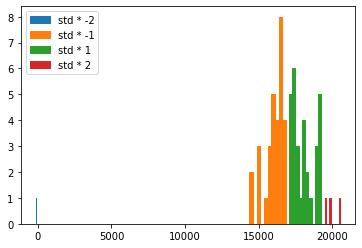

In [783]:
par2 = partition(result)
index = -2
for arr in par2: 
    res = []
    for elem in arr:
        tmp = np.zeros(64)
        tmp[elem] = 1
        res.append(decod(tmp, d, 64, 100)[-1])
    plt.hist(res, histtype='step', stacked=True, fill=True, label = "std * {}".format(index))
    index +=1
    if index == 0:
        index +=1
plt.legend()
plt.show()



In [775]:
utm.split_model_into_encoder_decoder(model3, True)

[INFO]: Extracting encoder and decoder from the model
<class 'tensorflow.python.keras.engine.training.Model'>
---------------------------- ENCODER ----------------------------
Model: "model_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  8080      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  5184      
Total params: 13,264
Trainable params: 13,264
Non-trainable params: 0
__________

(<tensorflow.python.keras.engine.training.Model at 0x28645cb4f48>,
 <tensorflow.python.keras.engine.training.Model at 0x28650066b48>)

In [3]:
train_size = 200
#trainY1 = utg.generate_training_set(knapSack.Size,train_size)
#utg.save(trainY1)
trainY1, trainY2 = utg.load_datasets(1,2)


[INFO]: Loss plot was saved in the directory:  saved_plots\to_delete.png


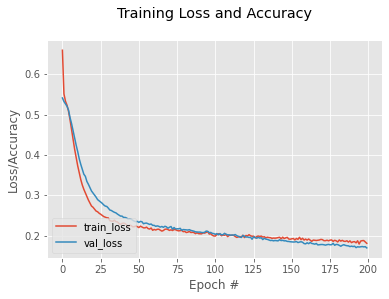

In [24]:
compression = 0.8
epochs = 200
batch_size = 10
reg_cof = 0.0002
dropout = 0.2
lr = 0.002

model1 = shallowNet.build(
    input_shape=knapSack.Size, 
    reg_cof= reg_cof, 
    lr = lr, 
    dropout= dropout, 
    compression=compression
)

H1 = model1.fit(
    trainY1, trainY1, 
    validation_split = 0.05,
    epochs=epochs, 
    batch_size=batch_size, 
    shuffle=True,
    verbose=0)
utp.plot_model_loss(H1, "to_delete.png", epochs)



[INFO]: Trajectory evoultion plot was saved in the directory:  saved_plots\to_delete.png
[INFO]: Trajectory evoultion plot was saved in the directory:  saved_plots\to_delete.png


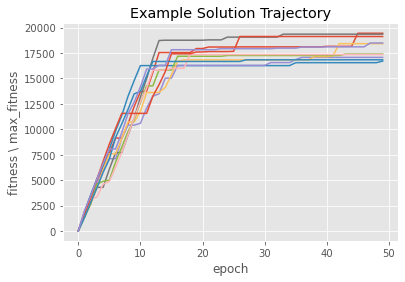

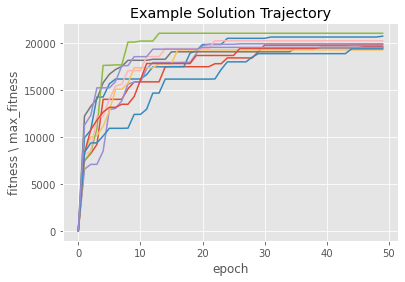

In [5]:
utp.plot_trajectory_evolution(knapSack.Size, 10, 50 ,"to_delete.png")
utp.plot_trajectory_evolution(knapSack.Size, 10, 50, "to_delete.png", model1 )

[INFO]: Loss plot was saved in the directory:  saved_plots\to_delete.png


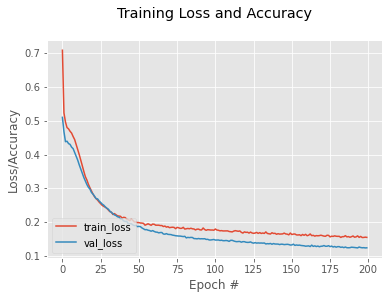

In [15]:

model2 = shallowNet.build(
    input_shape=knapSack.Size, 
    reg_cof= reg_cof, 
    lr = lr, 
    dropout= dropout, 
    compression=compression
)

H2 = model2.fit(
    trainY2, trainY2, 
    validation_split = 0.05,
    epochs=epochs, 
    batch_size=batch_size, 
    shuffle=True,
    verbose=0)
utp.plot_model_loss(H2, "to_delete.png", epochs)

In [16]:
model3 = utm.add_layer_to_model(model2, compression, dropout, reg_cof,lr,True )

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  8080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_transpose_4 (DenseTran (None, 80)                5264      
_________________________________________________________________
dense_transpose_3 (DenseTran (None, 100)               818

[INFO]: Loss plot was saved in the directory:  saved_plots\to_delete.png


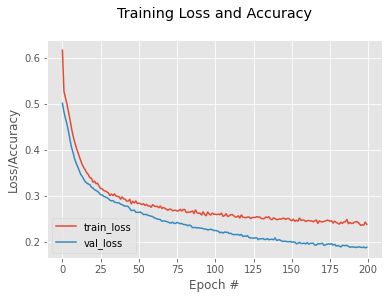

In [17]:
H3 = model3.fit(
    trainY2, trainY2, 
    validation_split = 0.05,
    epochs=epochs, 
    batch_size=batch_size, 
    shuffle=True,
    verbose=0)
utp.plot_model_loss(H3, "to_delete.png", epochs)

[INFO]: number of convoluted layers is equal to:  2
[INFO]: Weights of model were saved in the directory:  saved_plots\to_delete.png


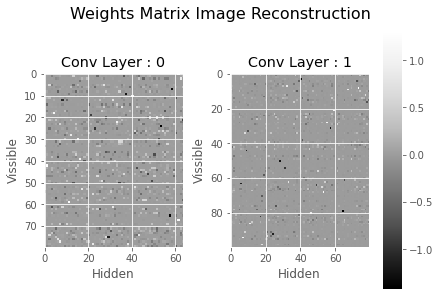

In [18]:
utp.plot_weights_model(model3, "to_delete.png")


[INFO]: Evolution model plot was saved in the directory:  saved_plots\to_delte.png


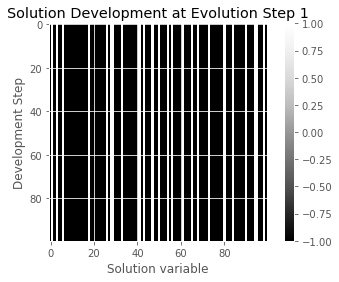

In [31]:
utp.plot_evolution_model(model3, trainY1, "to_delte.png", learning_steps=100)

[INFO]: Fitness development phase plot was saved in the directory:  saved_plots\to_delete.png
[INFO]: Fitness development phase plot was saved in the directory:  saved_plots\to_delete.png


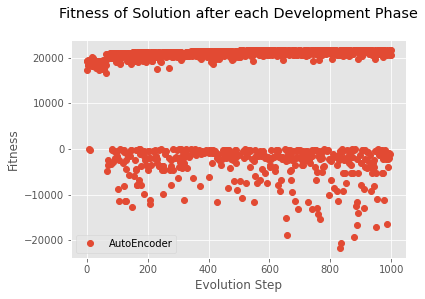

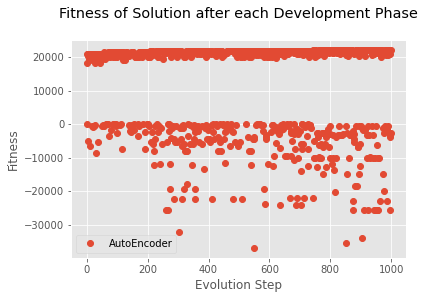

In [20]:
utp.plot_fitness_development_phase(model1, trainY1, "to_delete.png")
utp.plot_fitness_development_phase(model3, trainY1, "to_delete.png")

[INFO]: Trajectory evoultion plot was saved in the directory:  saved_plots\to_delete.png


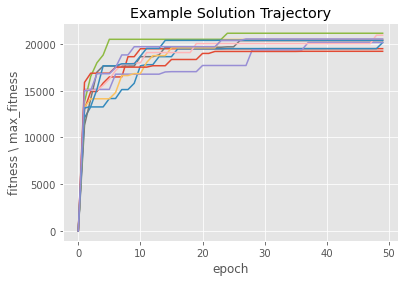

In [23]:
utp.plot_trajectory_evolution(knapSack.Size, 10, 50, "to_delete.png", model3 )

In [32]:
modeltmp = utg.load_models(3)[0]

In [35]:
#utp.plot_weights_model(modeltmp, "to_delete.png")
np.shape(modeltmp.layers[-1].get_weights()[1])

(100, 80)

In [36]:
modeltmp.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_transpose_2 (DenseTran (None, 80)                5264      
_________________________________________________________________
dense_transpose_1 (DenseTran (None, 100)               8180